Maryland Data Exploration
==============

Pandas reference links:

* http://pbpython.com/simple-graphing-pandas.html
* http://chrisalbon.com/python/pandas_time_series_basics.html
* http://www.swegler.com/becky/blog/2014/08/06/useful-pandas-snippets/

In [1]:
import datetime
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as pyplot

In [2]:
parser = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

In [3]:
df = pd.read_excel('/home/copelco/Desktop/MD/2013.xlsx',
                   parse_dates={'datetime': ['Date of Stop']})

In [4]:
list(df.columns.values)

['datetime',
 'Location',
 'Agency',
 'Time of Stop',
 'Gender',
 'DOB',
 'Age at the time of stop',
 'Unnamed: 7',
 'Race',
 'State of Residence',
 'Registration (tag)',
 'State of Registration',
 'County of Residence',
 'Stop Reason (Abbreviated)',
 'Stop Reason',
 'Search',
 'Search Reason',
 'Disposition',
 'Outcome',
 'Arrest Reason',
 'Arrest Made',
 'Search Conducted',
 'Duration of Search (in minutes)',
 'Duration of Stop      (in minutes)',
 'Reason for Search or Stop Article',
 'Reason for Search  or Stop Section',
 'Reason for Search or Stop Sub-Section',
 'Reason for Search or Stop Paragraph',
 'Crime Charged Article',
 'Crime Charged Section',
 'Crime Charged Sub-Section',
 'Crime Charged Paragraph']

In [65]:
len(df.index)

760613

In [4]:
df.Agency.value_counts()

Maryland State Police                                           208301
Baltimore Police Department                                      80308
Baltimore County Police Department                               72651
Montgomery County Police Department                              54647
Maryland Transportation Authority Police                         52497
Prince George's County Police Department                         40956
Anne Arundel County Police Department                            38590
Howard County Police Department                                  27433
Frederick Police Department                                      19840
Ocean City Police Department                                     13703
Charles County Sheriff's Office                                   9246
Harford County Sheriff's Office                                   9240
University of Maryland College Park Police                        8194
Greenbelt Police Department                                       7024
Carrol

In [25]:
is_search = df['Search'].notnull()
len(df[is_search].index)

23079

In [49]:
df[is_search].groupby(df.Agency)['Agency'].count().sort_values(ascending=False)

Agency
Montgomery County Police Department                             3053
Baltimore County Police Department                              2893
Maryland State Police                                           2720
Howard County Police Department                                 1920
Prince George's County Police Department                        1698
Anne Arundel County Police Department                           1667
Ocean City Police Department                                    1038
Maryland Transportation Authority Police                         777
Frederick Police Department                                      661
Charles County Sheriff's Office                                  580
Harford County Sheriff's Office                                  461
Cecil County Sheriff's Office                                    315
Annapolis Police Department                                      315
Laurel Police Department                                         308
Calvert County Sheriff's Of

In [50]:
len(df[is_search].index)/len(df.index)

0.03034263153535372

In [6]:
df.Race.unique()

array(['h', 'a', 'w', 'b', 'u', 'o', nan], dtype=object)

In [7]:
df.Outcome.unique()

array(['sero', 'warn', 'cit', 'arr', nan], dtype=object)

In [8]:
df.Search.unique()

array([nan, 'both', 'prop', 'pers', '   '], dtype=object)

In [13]:
df.Disposition.unique()

array([nan, 'none', 'contra', 'both', 'prop'], dtype=object)

In [5]:
df.Gender.unique()

array(['m', 'f', nan, 'm '], dtype=object)

In [12]:
df['State of Registration'].unique()

array(['i', 'o', nan], dtype=object)

In [13]:
df['State of Residence'].unique()

array(['i', 'o', nan], dtype=object)

In [14]:
df['County of Residence'].unique()

array(['Harford County', 'Baltimore City', nan, 'Cecil County',
       "Prince George's County", 'Carroll County', 'Howard County',
       'Baltimore County', 'Calvert County', 'Washington County',
       'Allegany County', 'Charles County', 'Anne Arundel County',
       'Montgomery County', "Queen Anne's County", 'Garrett County',
       'Dorchester County', 'Talbot County', 'Wicomico County',
       'Worcester County', 'Caroline County', "Saint Mary's County",
       'Frederick County', 'Kent County', 'Somerset County', ' '], dtype=object)

In [15]:
df['Stop Reason'].unique()

array(['22-206(a)', '13-411(f)', '21-201(a1)', ..., '22-402 (a)',
       '16-303(b)', '13-704(b)'], dtype=object)

In [16]:
df['Search Reason'].unique()

array([nan, 'incarrest', 'cons', 'other', 'prob', 'k9', 'exigent'], dtype=object)

In [17]:
df['Search Conducted'].unique()

array(['n', 'y', nan], dtype=object)

In [45]:
df[df['Agency'].str.contains('Montgomery')]['Agency'].unique()

array(['Maryland National Capital Park Police Montgomery County',
       'Montgomery County Police Department',
       "Montgomery County Sheriff's Office"], dtype=object)

In [6]:
in_montgomery = df['Agency'] == 'Montgomery County Police Department'
missing_race = df['Race'].isnull()
did_search = df.Search.notnull()
valid_time_value = df.datetime.dt.time > datetime.time(0, 0)

In [67]:
len(df[in_montgomery].index)

54647

In [38]:
len(df[in_montgomery & missing_race].index)

13

In [39]:
df[in_montgomery].Race.value_counts()

w    21795
b    16802
h     9455
a     3617
o     2944
u       21
Name: Race, dtype: int64

In [40]:
df[in_montgomery].Race.value_counts().sum()

54634

In [41]:
df[in_montgomery].Search.count()

3053

In [42]:
df[in_montgomery].Search.count()/df[in_montgomery].Race.value_counts().sum()

0.055880953252553357

In [43]:
df[in_montgomery].Search.value_counts()

both    2141
prop     540
pers     372
Name: Search, dtype: int64

In [44]:
df[in_montgomery & did_search].Race.value_counts()

b    1204
w    1042
h     651
a      86
o      70
Name: Race, dtype: int64

In [51]:
df[in_montgomery & did_search].Race.value_counts().sum()

3053

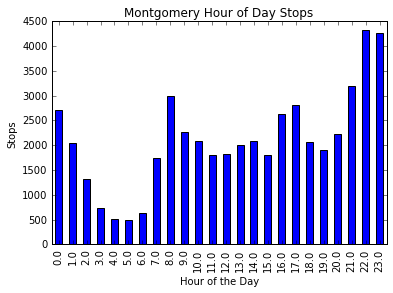

In [52]:
p = df[in_montgomery & valid_time_value]['datetime'].groupby(df.datetime.dt.hour).count().plot(kind='bar',
                                                                                               title="Montgomery Hour of Day Stops")
p.set_xlabel("Hour of the Day")
p.set_ylabel("Stops")

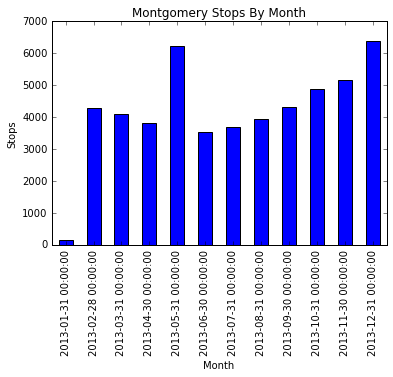

In [53]:
p = df[in_montgomery & valid_time_value].groupby(pd.Grouper(key='datetime', freq='1M')).count()['Location'].plot(kind='bar',
                                                                                                                 title="Montgomery Stops By Month")
p.set_xlabel("Month")
p.set_ylabel("Stops")

In [65]:
p = df[in_montgomery & valid_time_value].groupby([pd.Grouper(key='datetime', freq='1M'), 'Race'])['Race'].count()